# Westeros tutorial - Adding DACCS in climate mitigation scenario (v-GWa)
In the previous tutorials, we have learnt how to create a baseline scenario (`westeros_baseline.ipynb`) and add emissions bounds (`westeros_emissions_bounds.ipynb`) to the baseline scenario. Here, we will show how to include an additional/new technology to a MESSAGE model. While the combination of currently existing technologies might be able to deliver the Paris targets, the deployment of some new technologies might improve the probability of meeting the targets and/or reducing the costs. These technologies include CO2 removal (CDR) technologies. Hence, in this tutorial, we will use direct air carbon capture and storage (DACCS) as an example of new technologies to be considered in climate mitigation pathways. 

In order to smoothly follow this tutorial, you have to alrady have the MESSAGEix framework installed and working. Additionally, you should have run the Westeros baseline and emissions bounds scenarios successfully as this tutorial is built on top of those scenarios.

If all set, we can start by importing all the packages we need and connect to a database that store the scenario input and results. We can also name the model as `Westeros Electrified` here.

In this tutorial, we will use add_dac tool which requires user to specify the location of the data, in yaml format. As such, we use os package to help us specifying the yaml file.

In [1]:
import os

import pandas as pd
import ixmp
import message_ix

from message_ix.utils import make_df
from message_ix.tools.add_dac import *

%matplotlib inline

mp = ixmp.Platform()

model = "Westeros Electrified"

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


After we are connected to the database, we can call the prevously run `"emission_bound"` scenario as our base model and clone the data before we start adding DACCS to the model. As prevoiusly mentioned, to run this tutorial, you have to have succesfully run the `"emission_bound"` scenario, which was built based on the `"baseline"` scenario.

In [2]:
base = message_ix.Scenario(mp, model=model, scenario="emission_bound")

scenario = base.clone(
    model,
    "emission_bound_daccs",
    "adding daccs using add_dac tool",
    keep_solution=False,)
scenario.check_out()

year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scenario.set("year")
country = "Westeros"

# Adding DACCS description
First step of adding DACCS as a technology in the model is by including DACCS into the `"technology"` set.

In [3]:
mp.add_unit("kWa")


#filepath = 'C:/Users/pratama/Documents/GitHub/MESSAGEix/message_ix/tutorial/tutorial/data/tech_data.yaml'
filepath = os.path.join(os.getcwd(), "data/tech_data_vGWa.yaml")
add_dac(scenario, filepath=filepath)


Similar to what we did when generating the `"baseline"` scenario, the first thing we need to do is defining the input and output comodities of each technology. 

# Solve Statement and Plotting Results
Finally, this is the solve statement and plotting results command

In [4]:
scenario.commit(comment="Adding daccs using add_dac tool")
scenario.set_as_default()

scenario.solve()
scenario.var("OBJ")["lvl"]

print('Objective value: ', scenario.var("OBJ")["lvl"])



Objective value:  189482.0625


C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\util\tutorial.py:50: FutureWarning: Calling Key.from_str_or_key(value) with no other arguments is no longer necessary; simply use Key(value)
  key = Key.from_str_or_key(key_str)
C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\util\tutorial.py:50: FutureWarning: Calling Key.from_str_or_key(value) with no other arguments is no longer necessary; simply use Key(value)
  key = Key.from_str_or_key(key_str)
C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\util\tutorial.py:50: FutureWarning: Calling Key.from_str_or_key(value) with no other arguments is no longer necessary; simply use Key(value)
  key = Key.from_str_or_key(key_str)
C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\util\tutorial.py:50: FutureWarning: Calling Key.from_str_or_key(value) with no other arguments is no longer necessary; simply use Key(value)
  key = Key.from_str_or_key(key_str)
C:\Users\pratama\Documen

<Axes: title={'center': 'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

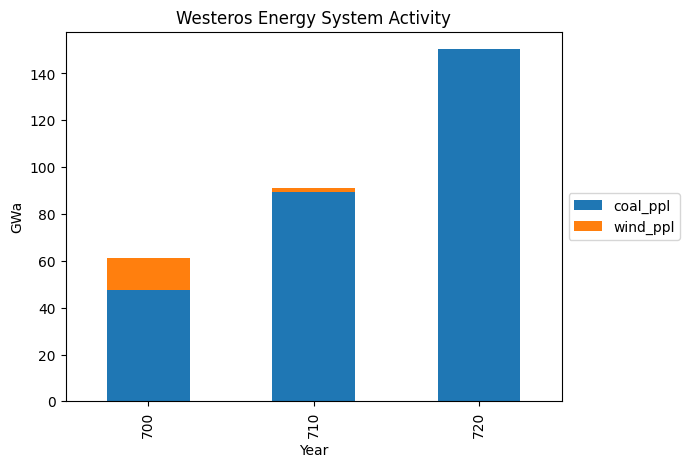

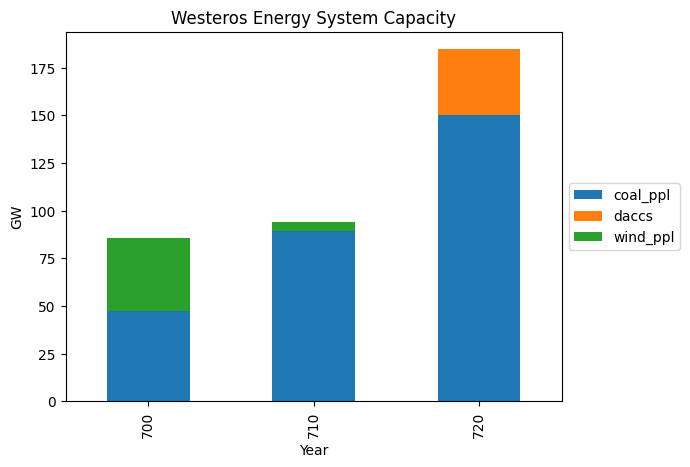

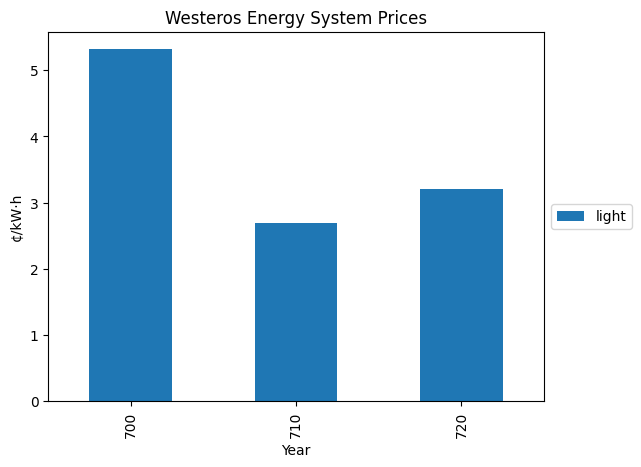

In [5]:
# Create a Reporter object to describe and carry out reporting
# calculations and operations (like plotting) based on `scenario`
# Add keys like "plot activity" to describe reporting operations.
# See tutorial/utils/plotting.py
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scenario)

prepare_plots(rep)

# Only show a subset of technologies in the follow plots;
# e.g. exclude "bulb" and "grid"
rep.set_filters(t=["coal_ppl", "wind_ppl","daccs"])

# Trigger the calculation and plotting
rep.get("plot activity")

# Create a different plot. The same filters are still active.
rep.get("plot capacity")

# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(t=None, c=["light"])

# Create a price plot
rep.get("plot prices")



## Close the connection with the database

In [6]:
mp.close_db()